#LIBERARIES

In [ ]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#---------------------------------------------------------------------------------------------->GRID_SEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->SCORE_FOR_REGRESSION
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->statsmodels(PERFORM_LINEAR_REGRESSION)
import statsmodels.api as sm
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
#---------------------------------------------------------------------------------------------->REGRESSION_MODELS(XGBRegressor,LinearRegression)
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import missingno as msng
#---------------------------------------------------------------------------------------------->EXCEPTION_WARNING
import warnings
warnings.filterwarnings("ignore")

#LOAD_DATA

In [ ]:
df = pd.read_csv('/content/insurance-data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

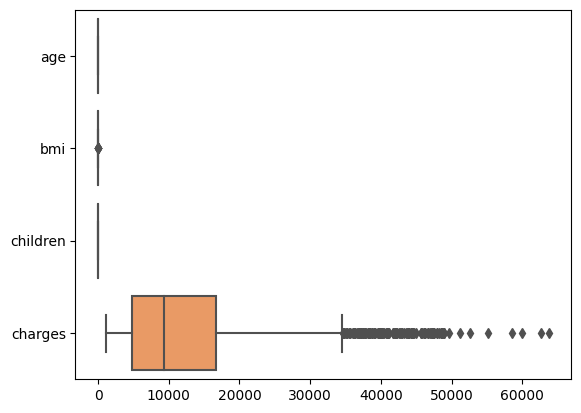

In [ ]:
sns.boxplot(data=df,palette='rainbow',orient='h')

#ENCODING

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
ENCODING_MAP = {'yes': 1,'no':0}
df['smoker'] = [ENCODING_MAP[i] for i in df['smoker']]

In [ ]:
ENCODING_MAP = {'female': 1,'male':0}
df['sex'] = [ENCODING_MAP[i] for i in df['sex']]

In [ ]:
df_dummies = pd.get_dummies(df['region'],drop_first=True, prefix='region')
new_df = pd.concat([df, df_dummies], axis=1)
new_df.drop(['region'],axis=1,inplace=True)

In [ ]:
new_df['smoker'].unique()

array([1, 0])

In [ ]:
new_df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,1,0,0
1334,18,1,31.920,0,0,2205.98080,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,1


#SPLITTING_DATA

In [ ]:
x=new_df.loc[:,new_df.columns != 'charges']
y=new_df['charges']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid =train_test_split(x_train,y_train,test_size=.1, random_state=42)

#LINEAR_REGRESSION

In [ ]:
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid= {'fit_intercept': [True, False], 'positive': [True, False]})
grid_result_V= G_L_REG.fit(x_train,y_train)
print(grid_result_V.best_params_)

{'fit_intercept': True, 'positive': True}


In [ ]:
y_pred_test_L_V=grid_result_V.predict(x_test)
score_test_L_V=r2_score(y_test,y_pred_test_L_V)*100
print("score_test_L_V for our test dataset with tuning is : {:.2f}%".format(score_test_L_V))

score_test_L_V for our test dataset with tuning is : 78.11%


#STATSMODELS TO _PERFORM_LINEAR_REGRESSION

In [ ]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const              -12012.331208
age                   253.077625
sex                   198.144887
bmi                   340.717731
children              388.948734
smoker              23520.468569
region_northwest     -526.976635
region_southeast     -558.230211
region_southwest     -785.546767
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     338.7
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.35e-272
Time:                        22:45:24   Log-Likelihood:                -9756.6
No. Observations:                 963   AIC:                         1.953e+04
Df Residuals:                     954   BIC:                         1.957e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.201e+04   1186.345  

In [ ]:
x_test_sm = sm.add_constant(x_test)
y_pred_sm = lr.predict(x_test_sm)

In [ ]:
score_test_L_SM=r2_score(y_test,y_pred_sm)*100
print("score_test_L_SM for our test dataset with tuning is : {:.2f}%".format(score_test_L_SM))

score_test_L_SM for our test dataset with tuning is : 78.27%


#FINAL_RESULTS_SCORES_LINEAR_REGRESSION_AND_STATES_MODELS_PLOTTING

Text(0.5, 1.0, 'SCORE_LINEAR_REGRESSION_AND_STATES_MODELS')

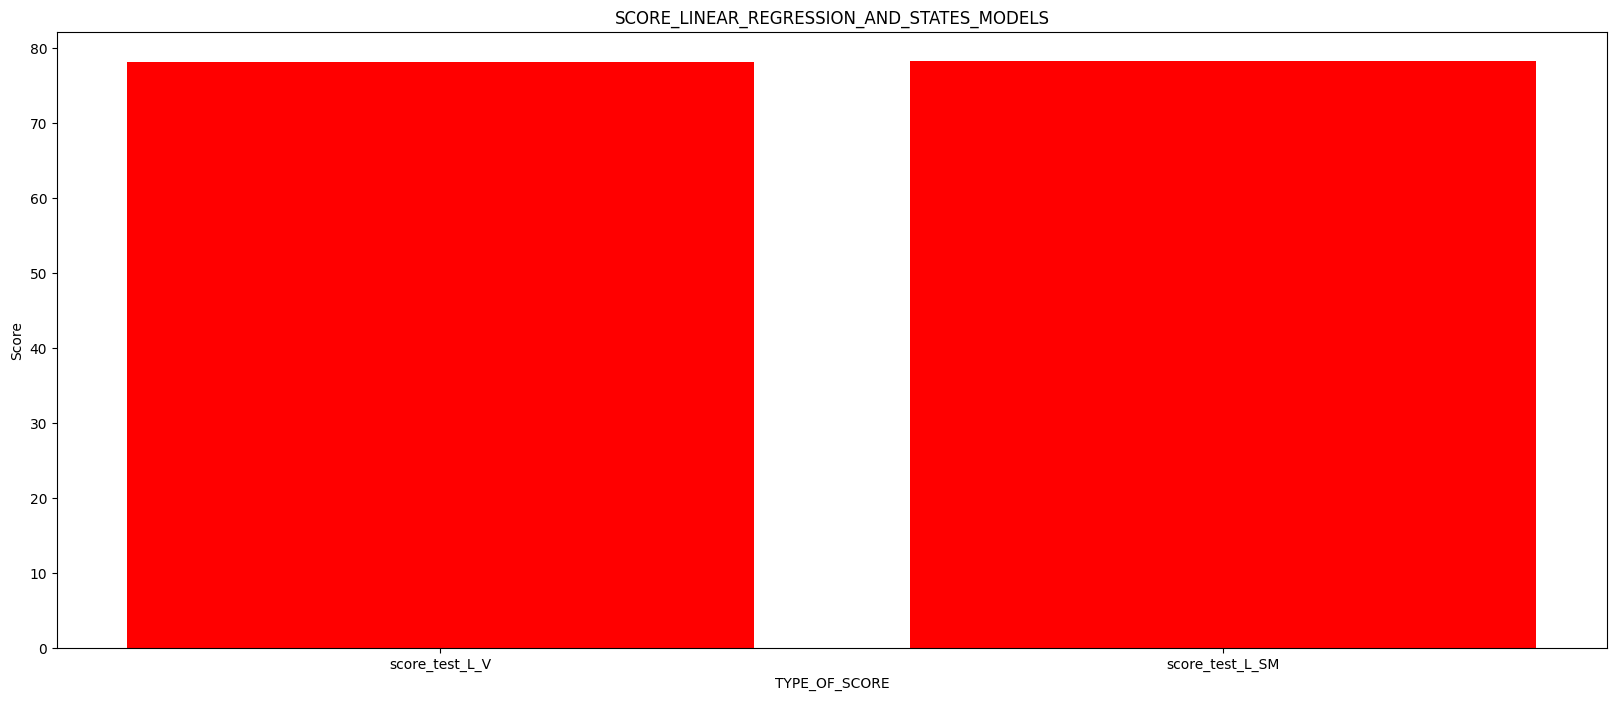

In [ ]:
X= ["score_test_L_V","score_test_L_SM"]
Y=[score_test_L_V,score_test_L_SM ]
plt.figure(figsize=(20,8))
plt.bar(X , Y,color='RED')
plt.xlabel("TYPE_OF_SCORE")
plt.ylabel("Score")
plt.title("SCORE_LINEAR_REGRESSION_AND_STATES_MODELS")

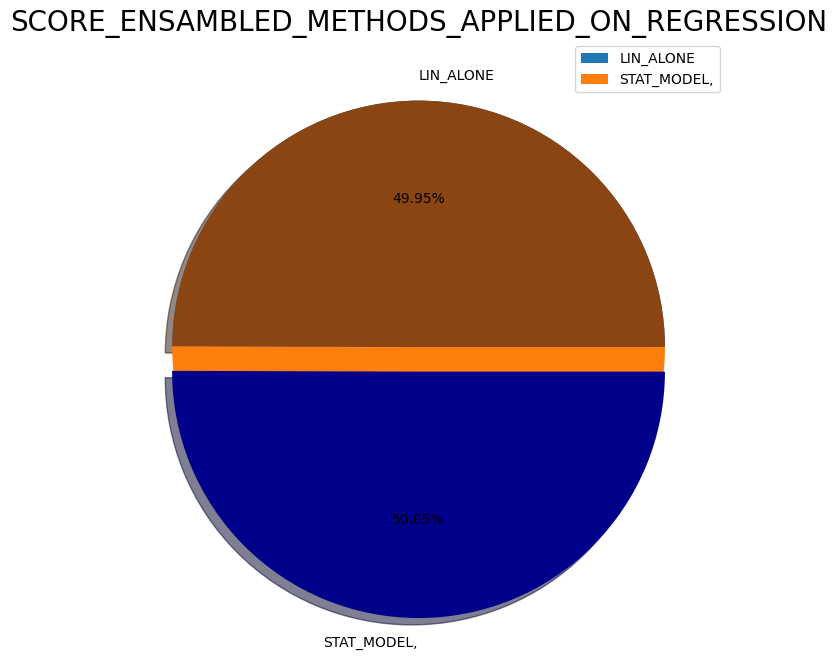

In [ ]:
X= ["LIN_ALONE","STAT_MODEL,"]
DATA=[78.11,78.27,]
colors = ['saddlebrown', 'darkblue']
EXPLOD = [0.0, 0.1]
plt.figure(figsize=(50, 8))
plt.pie(DATA)
plt.title("SCORE_ENSAMBLED_METHODS_APPLIED_ON_REGRESSION", fontsize=20)
plt.legend(X)
plt.pie(DATA,
        explode=EXPLOD,
        labels=X,
        colors=colors,
        autopct='%.2f%%',
        shadow=True)
plt.show()